In [1]:
import elf 
import siesta_utils.grid as siesta 
from siesta_utils.conversions import AtoBohr
from ase.io import read, write
import numpy as np 
# import xcml
import pickle
import re
from ase import Atoms
from elf import ElF
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
basis = {'r_o_o': 1.0,'r_i_o': 0.05, 'r_i_h': 0.0, 'r_o_h' : 1.5,
                      'n_rad_o' : 2,'n_rad_h' : 2, 'n_l_o' : 3,
                      'n_l_h' : 2, 'gamma_o': 0, 'gamma_h': 0}

In [4]:
elf.utils.preprocess_all('outputs', basis, method='nn')

[[<elf.elf.ElF at 0x7f5e2e4a1fd0>,

In [29]:
elfs = elf.utils.hdf5_to_elfs('outputs_processed.hdf5','O')

In [30]:
elfs[0][0].value

array([227.64159513,  11.30676705,  -8.05829075,   6.05902847,
         2.36131057,   0.8760188 ,  -1.45980078,  -4.110038  ,
         2.07927851, 106.97237157,  -7.25368163,   5.44236054,
        -4.15374066,  -3.77045567,  -1.46745654,   1.9602987 ,
         8.70254672,  -2.68699264])

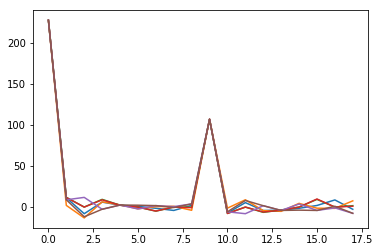

In [31]:
for sys in elfs:
    for e in sys:
        plot(e.value)

In [6]:
atoms_list = read('outputs.traj',':')

In [7]:
for atoms in atoms_list:
    print(atoms.get_positions())

[[-1.46213263 -0.02836652  0.00965133]
 [-1.81047274  0.78502261  0.37674581]
 [-0.50843459  0.11155114 -0.02419792]
 [ 1.46213263  0.02836652 -0.00965133]
 [ 1.76605057 -0.73273341  0.48926647]
 [ 2.12825938  0.70183355  0.139499  ]]
[[-1.46450134 -0.03944256  0.        ]
 [-1.85985478  0.83309287  0.        ]
 [-0.5148766   0.12621263  0.        ]
 [ 1.46450134  0.03944256  0.        ]
 [ 1.8160873  -0.85282994  0.        ]
 [ 2.23454094  0.61011505  0.        ]]
[[-1.41092474  0.          0.        ]
 [-2.05630576 -0.26392757  0.65776058]
 [-0.75691207 -0.70499074  0.        ]
 [ 1.41092474  0.          0.        ]
 [ 2.05630576  0.26392757 -0.65776058]
 [ 0.75691207  0.70499074  0.        ]]


In [8]:
np.sort([1,4,3])

array([1, 3, 4])

In [34]:
feat = np.genfromtxt('/home/sebastian/Documents/Physics/Code/exchange_ml/data/processed_dz/dimers/final/descr_O_aligned_mol.dat',
                    delimiter = ',').reshape(-1,18)

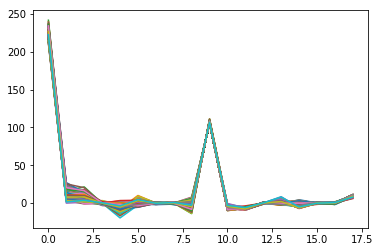

In [35]:
plot(feat[::2].T);